# Machine Learning November Minor Project

###                                                                                                     Done By Suprith Shettigar

## create a classification model to predict the price range of the mobile based on the certian specification.

### importing all the required libraries:

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [83]:
df = pd.read_excel('mobile_price_range_data.xlsx')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [84]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [85]:
df.shape

(2000, 21)

### Target variable

In [86]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

### removing null values in the dataset. 

In [87]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### handling dupilcate values in the given dataset: 

In [88]:
df.duplicated().sum()

0

In [89]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### checking datatypes in the given dataset

In [90]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#### Selecting dependents(x) and independents(y) variables :

In [91]:
x = df.drop('price_range',axis=1)
y = df['price_range']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
#x_train,y_train i.e x and y (train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2000, 20)
(2000,)


### splitting data into training and test data

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1500, 20)
(1500,)
(500, 20)
(500,)


## confusion matrix

In [94]:
from sklearn.metrics import confusion_matrix,classification_report

In [95]:
def eval_model(y_test,ypred):
    cm=confusion_matrix(y_test,ypred)
    print("confusion matrix:")
    print(cm)
    print("\n\n")
    print("classification report:")
    print(classification_report(y_test,ypred))

def mscore(model):
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))

## Applying all the following models on training dataset to generate the predicted value for the test dataset

### a) Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
m1 = LogisticRegression(max_iter=10000,solver='liblinear')
m1.fit(x_train,y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [98]:
mscore(m1)

Training score 0.794
Testing score 0.786


In [99]:
ypred_m1=m1.predict(x_test)
eval_model(y_test,ypred_m1)

confusion matrix:
[[123   7   2   0]
 [ 13  72  33   0]
 [  0  24  72  24]
 [  0   0   4 126]]



classification report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       132
           1       0.70      0.61      0.65       118
           2       0.65      0.60      0.62       120
           3       0.84      0.97      0.90       130

    accuracy                           0.79       500
   macro avg       0.77      0.78      0.77       500
weighted avg       0.78      0.79      0.78       500



### b) KNN Classification:

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
m2 = KNeighborsClassifier(n_neighbors=23)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [107]:
mscore(m2)

Training score 0.942
Testing score 0.94


In [108]:
ypred_m2 = m2.predict(x_test)
eval_model(y_test,ypred_m2)

confusion matrix:
[[128   4   0   0]
 [  5 112   1   0]
 [  0   9 107   4]
 [  0   0   7 123]]



classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       132
           1       0.90      0.95      0.92       118
           2       0.93      0.89      0.91       120
           3       0.97      0.95      0.96       130

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



### c) SVM Classifier with linear and rbf kernel

In [116]:
from sklearn.svm import SVC

In [120]:
m3 = SVC(kernel='linear',C=1)
m3.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [121]:
mscore(m3)

Training score 0.992
Testing score 0.97


In [122]:
ypred_m3=m3.predict(x_test)
eval_model(y_test,ypred_m3)

confusion matrix:
[[127   5   0   0]
 [  1 117   0   0]
 [  0   3 112   5]
 [  0   0   1 129]]



classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       132
           1       0.94      0.99      0.96       118
           2       0.99      0.93      0.96       120
           3       0.96      0.99      0.98       130

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



### d) Decision Tree Classifier:

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
m4=DecisionTreeClassifier(criterion='entropy',max_depth=5)
m4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [102]:
mscore(m4)

Training score 0.8793333333333333
Testing score 0.826


In [103]:
ypred_m4=m4.predict(x_test)
eval_model(y_test,ypred_m4)

confusion matrix:
[[121  11   0   0]
 [ 11  97  10   0]
 [  0  19  82  19]
 [  0   0  17 113]]



classification report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       132
           1       0.76      0.82      0.79       118
           2       0.75      0.68      0.72       120
           3       0.86      0.87      0.86       130

    accuracy                           0.83       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.83      0.83      0.83       500



### e) Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
m5 = RandomForestClassifier(n_estimators=80,criterion='entropy',max_depth=7)
m5.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=80)

In [113]:
mscore(m5)

Training score 0.9753333333333334
Testing score 0.86


In [115]:
ypred_m5 = m5.predict(x_test)
eval_model(y_test,ypred_m5)

confusion matrix:
[[124   8   0   0]
 [ 10  96  12   0]
 [  0  17  88  15]
 [  0   0   8 122]]



classification report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       132
           1       0.79      0.81      0.80       118
           2       0.81      0.73      0.77       120
           3       0.89      0.94      0.91       130

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



### Data visualisatiion by seaborn graphs

### a) logistic regression model confusion matrix:

Text(50.722222222222214, 0.5, 'Actual')

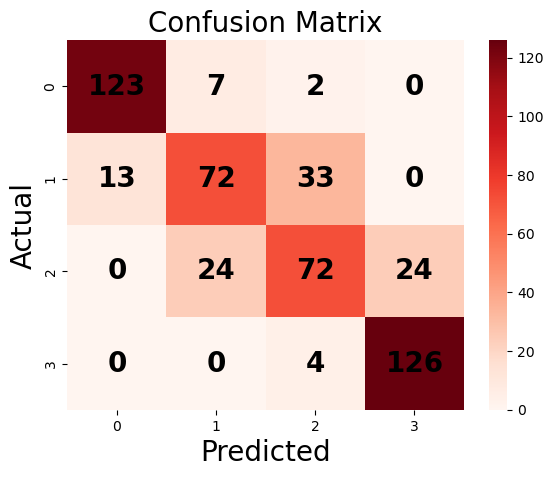

In [130]:
cm=confusion_matrix(y_test,ypred_m1)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d',annot_kws={"size": 20,'weight':'bold','color':'black'})
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)


### b) KNN classification confusion matrix:

Text(50.722222222222214, 0.5, 'Actual')

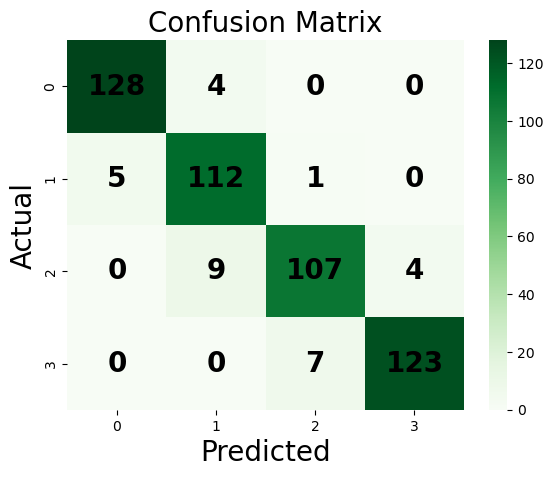

In [147]:
cm=confusion_matrix(y_test,ypred_m2)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d',annot_kws={"size": 20,'weight':'bold','color':'black'})
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)

### c) SVM classification confusion matrix:

Text(50.722222222222214, 0.5, 'Actual')

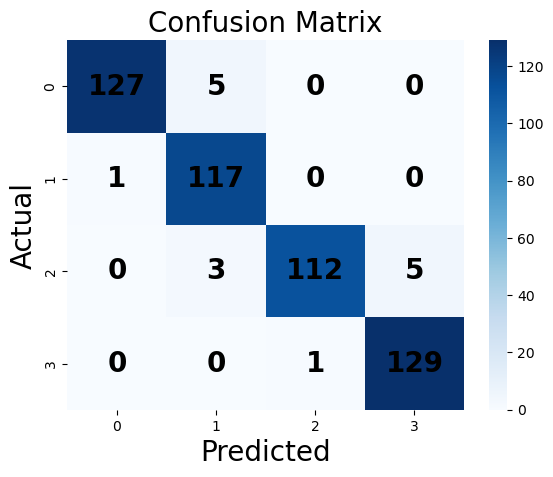

In [131]:
cm=confusion_matrix(y_test,ypred_m3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',annot_kws={"size": 20,'weight':'bold','color':'black'})
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)

### decision tree classifier confusion matrix:

Text(50.722222222222214, 0.5, 'Actual')

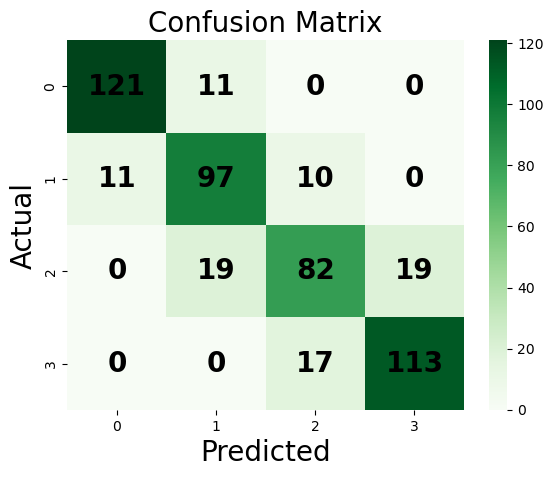

In [136]:
cm=confusion_matrix(y_test,ypred_m4)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d',annot_kws={"size": 20,'weight':'bold','color':'black'})
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)

### Random Forest Classifier connfusion matrix:

Text(50.722222222222214, 0.5, 'Actual')

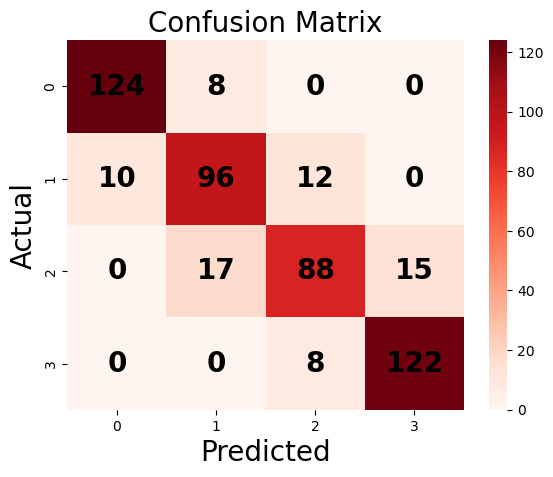

In [149]:
cm=confusion_matrix(y_test,ypred_m5)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d',annot_kws={"size": 20,'weight':'bold','color':'black'})
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)

## The Score of predicting the price range for the test data:

In [141]:
print("logistic regression accuracy score:")
print(mscore(m1))
print("\n\n")
print("KNN predict score:")
print(mscore(m2))
print("\n\n")
print("Support vector machine (svm) score: ")
print(mscore(m3))
print("\n\n")
print("Decision Tree classifier score: ")
print(mscore(m4))
print("\n\n")
print("Random Forest score:")
print(mscore(m5))

logistic regression accuracy score:
Training score 0.794
Testing score 0.786
None



KNN predict score:
Training score 0.942
Testing score 0.94
None



Support vector machine (svm) score: 
Training score 0.992
Testing score 0.97
None



Decision Tree classifier score: 
Training score 0.8793333333333333
Testing score 0.826
None



Random Forest score:
Training score 0.9753333333333334
Testing score 0.86
None


# Conclusion 

From the above results we can tell that the SVM shows the best results among all the other classifers
The order of their test scores goes like this:<br>
1.Support Vector Machine (SVM)<br>
2.KNN Classifier<br>
3.Random Forest<br>
4.Desision Tree<br>
5.Logistic Regression<br>